In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import SGD
import cv2

In [3]:
df=pd.read_csv("A_Z Handwritten Data.csv")

In [5]:
data_array = np.array(df,dtype=np.uint8)

In [7]:
labels = data_array[:,0]
x = data_array[:,1:].reshape(372450,28,28)/255.

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,labels,test_size=0.01)

In [11]:
nn_model = Sequential([Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(64,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.125),
                    BatchNormalization(),
                    Dense(26,activation='softmax')])
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(momentum=0.9),metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
nn_model_fit = nn_model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=1)

10371/10371 ━━━━━━━━━━━━━━━━━━━━ 1754s 169ms/step - accuracy: 0.9028 - loss: 0.3446 - val_accuracy: 0.9824 - val_loss: 0.0592


In [15]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [17]:
def unseendata_test(filepath):
    image = cv2.imread(filepath)
    thresh = cv2.adaptiveThreshold(cv2.cvtColor(cv2.medianBlur(image, 7), cv2.COLOR_BGR2GRAY), 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 41, 25)
    digits = [np.pad(cv2.resize(thresh[y:y+h, x:x+w], (18, 18)), ((5, 5), (5, 5)), "constant") for x, y, w, h in map(cv2.boundingRect, sorted(cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0], key=lambda c: cv2.boundingRect(c)[0]))]
    
    plt.imshow(image), plt.xticks([]), plt.yticks([]), plt.show()

    preds = [alpha[np.argmax(nn_model.predict(d.reshape(1, 28, 28, 1)/255.))] for d in digits]
    for i, d in enumerate(digits, 1): plt.subplot(1, len(digits), i), plt.imshow(d.reshape(28, 28), cmap="gray"), plt.xticks([]), plt.yticks([]), plt.title(preds[i-1], color='green', fontsize=18)
    
    print("Alphabets detected:", *preds)


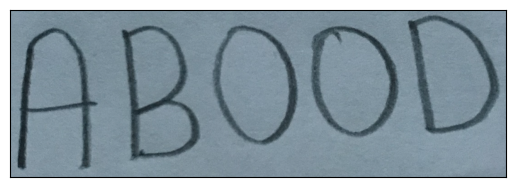

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Alphabets detected: A B O O D


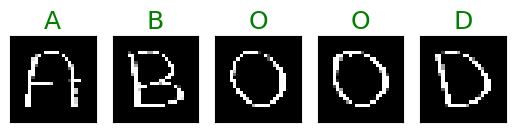

In [19]:
unseendata_test('image2.png')

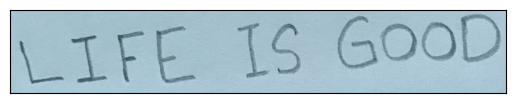

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Alphabets detected: L I F E I S G O O D


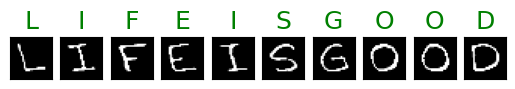

In [21]:
unseendata_test('image3.png')